Title: Analysis of Resting Blood Pressure vs. Maximum Heart Rate for Chest Pain Classification

Introduction:

For our project proposal we will be using is a modified version of the UCI Heart Disease dataset. The UCI Heart Disease dataset includes four databases of the countries: Cleveland, Hungary, Switzerland, and the VA Long Beach, we will be using Cleveland for our prediction (maybe include why). The Heart Disease Cleveland dataframe includes the variables: trestbps and thalach which we will be using to predict our variable of intrest: cp. In the dataframe, trestbps refers to the resting blood pressure on admission to the hospital measured in mm Hg, thalach refers to maximum heart rate achieved measured in bps and cp means chest pain type with a value of: 1 meaning typical angina, 2 meaning atypical angina, 3 meaning non-anginal pain, 4 meaning asymptomatic. With these resources, we will be answering our question: Can we classify chest pain using resting blood pressure and maximum heart rate achieved.

Preliminary exploratory data analysis:
1. Demonstrate that the dataset can be read from the web into R 
2. Clean and wrangle your data into a tidy format
3. Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
4. Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

Methods:

The data analysis would be using the trestbps, thalach, and cp columns, which stand for the resting blood pressure (mm Hg), maximum heart rate achieved (BPM), and chest pain types. We want to understand what chest pain type could be fit with different maximum heart rates and resting blood pressure. The prediction would be measured based on a classification model. Both predictor variables are quantitative for predicting the categorial class. The classification would be done with the application of k nearest neighbor algorithm as it does not require any specific shape assumption for the algorithm to perform well.
To visualize the result,a  scatter plot would be used with thestandardizedd variables to make sure the classifier would not treat one of thevariablese to matter more than the other. Each type of chest pain would belabeledd with different colors for clear identification.



Expected outcomes and significance:

What do you expect to find?

I ecpect to find that the highest chest pain would be find in a patient with high maximum heart rate and resting blood pressure.

What impact could such findings have?

The impact of such findings can help us to find out if the patient is lying or telling the truth about their chest because some patients might exhagerate their symptons so that they can get more attention and time from the medical staffs. So, we can use this findings to save time for medical staffs and use the time to dedicate to other patients.

What future questions could this lead to?



In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

# start the coding here

In [2]:
# read data here

cleveland_data <- read.table("data/heart_disease/processed.cleveland.data", sep=",")
colnames(cleveland_data)<-c('age','sex','cp','trestbps','chol','fbs', 'restcg', 'thalach',
                                     'exang','oldpeak','slope','ca','thal','num')
# cleveland_data

#clean the data
cleveland_clean <- cleveland_data |> mutate(age = as.numeric(age),
                                                sex = as_factor(sex),
                                                cp = as_factor(cp),
                                                trestbps = as.numeric(trestbps),
                                                chol = as.numeric(chol),
                                                fbs = as_factor(fbs),
                                                restcg = as_factor(restcg),
                                                thalach = as.numeric(thalach),
                                                exang = as_factor(exang),
                                                oldpeak = as.numeric(oldpeak),
                                                slope = as.numeric(slope),
                                                ca = as.numeric(ca),
                                                thal = as_factor(thal),
                                                num = as.numeric(num))|>
 mutate( sex = fct_recode(sex, "male" = "1", "female" = "0"),
                          cp=fct_recode(cp, "typical angina"="1", "atypical angina"="2",
                                      "non-anginal pain"="3", "asymptomatic"="4"))

cleveland_clean
                             
# Using the values of trestbps + thalach to predict/classify the cp of an unknown patient.

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
63,male,typical angina,145,233,1,2,150,0,2.3,3,0,6.0,0
67,male,asymptomatic,160,286,0,2,108,1,1.5,2,3,3.0,2
67,male,asymptomatic,120,229,0,2,129,1,2.6,2,2,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,male,asymptomatic,130,131,0,0,115,1,1.2,2,1,7.0,3
57,female,atypical angina,130,236,0,2,174,0,0.0,2,1,3.0,1
38,male,non-anginal pain,138,175,0,0,173,0,0.0,1,NA,3.0,0


In [3]:
set.seed(20)
#select columns:trestbps, thalach, cp
cleveland_select<- cleveland_clean|>
select(trestbps, thalach, cp)

#split the dataset into training set and testing set

cleveland_split<-initial_split(cleveland_select, prop=0.75, strata=cp)
cleveland_train<-training(cleveland_split)
cleveland_test<-testing(cleveland_split)

cleveland_train

trestbps,thalach,cp
<dbl>,<dbl>,<fct>
160,108,asymptomatic
120,129,asymptomatic
140,160,asymptomatic
⋮,⋮,⋮
126,134,non-anginal pain
130,150,non-anginal pain
152,150,non-anginal pain


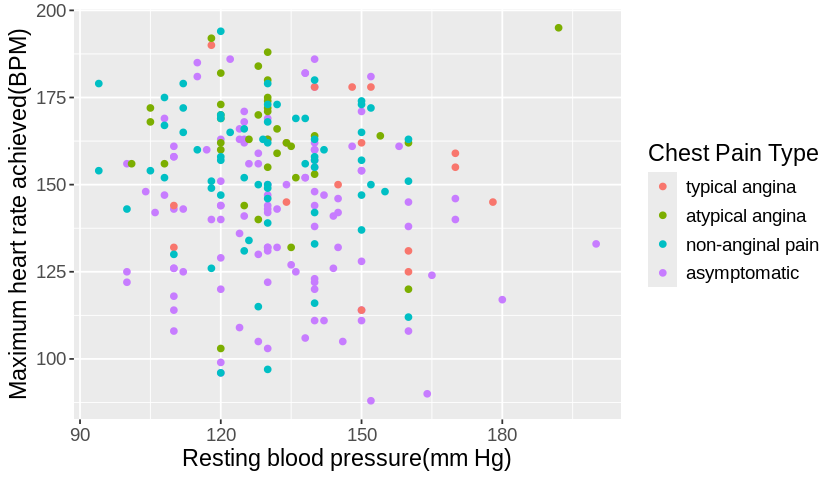

In [11]:
#The unscaled plot with training data here
options(repr.plot.width=7, repr.plot.height=4)


cleveland_train_plot <-cleveland_train |>
ggplot(aes(x=trestbps, y=thalach, color=cp))+
geom_point(aes(colour=cp))+
labs(x="Resting blood pressure(mm Hg)",y="Maximum heart rate achieved(BPM)", 
     colour="Chest Pain Type")+
theme(text=element_text(size=14))

cleveland_train_plot

In [5]:
#scale the values

#cleveland_
#cleveland_recipe<-recipe(cp~trestbps+thalach, data=cleveland_train)|> 
#step_scale(all_predictors())|> 
#step_center(all_predictors())

In [6]:
#knn_spec
#knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = ) |>
#    set_engine("kknn") |>
#    set_mode("classification")